Product Performance
- Identify top selling products and categories based on 'total_paid' and 'product_quantity'
- Compare performance of discounted vs non discounted products

In [ ]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import files from pandas

In [ ]:
# orders_cl.csv
url = "https://drive.google.com/file/d/1HFX3bhGt3rN-VpZ8CuKJG1tJ_Jpf3wAN/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_cl = pd.read_csv(path)

# orderlines_cl.csv
url = "https://drive.google.com/file/d/11mBDTLu39du9KTYBP6uSaVrgW7Yr4MdX/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_cl = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

# brands.csv
url = "https://drive.google.com/file/d/1m1ThDDIYRTTii-rqM5SEQjJ8McidJskD/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands_df = pd.read_csv(path)

In [ ]:
orders_qu = orders_cl.copy()
orderlines_qu = orderlines_cl.copy()
products_qu = products_cl.copy()
brands_qu = brands_df.copy()

In [ ]:
product_category_df = products_cl.copy()

create empty column named category

In [ ]:
product_category_df.loc[:,'category']= ""

Category creation

In [ ]:
#keyboard
product_category_df.loc[(product_category_df["name"].str.contains("keyboard", case=False)) &
                    ((~product_category_df["name"].str.contains("cover|protector|ipad|charger|support|trackpad", case=False))|
                        (~product_category_df["name"].str.contains("cover|protector|ipad|charger|support|trackpad", case=False))), 'category'
] += "keyboard"

#ipadkeyboard
product_category_df.loc[(product_category_df["name"].str.contains("keyboard", case=False)) &
                    (product_category_df["name"].str.contains("ipad", case=False)), 'category'
] += "ipad-keyboard"

#smartphone
product_category_df.loc[((product_category_df["name"].str.contains("^.{0,11}apple iphone|Open - 32GB Apple iPhone", case=False))|
                        (product_category_df["desc"].str.contains("^.{0,11}apple iphone", case=False)))&
                      (product_category_df['price']>350.0), 'category'
]+= "smartphone"

#ipod
product_category_df.loc[product_category_df["name"].str.contains("^.{0,11}apple ipod", case=False), "category"] += "ipod"

#tablet
product_category_df.loc[((product_category_df["name"].str.contains("^.{0,11}apple ipad|tablet|ipad|Professional graphics tablet", case=False)) |
                        (product_category_df["name"].str.contains("^.{0,11}apple ipad|tablet|Professional graphics tablet", case=False))) &
                         ((~product_category_df["name"].str.contains("Art Pen|robotic|Gloves|iFixit|Headset|EarPods|headphones|USB 3.0 Thunderbolt|screen protector|digital pen|powerstation|case|cover|bose|car|Intelligent|repair|Connection Kit|Remote Control|Glass Screen Protector|lens|adapter|surveillance", case=False)) &
                          (~product_category_df["desc"].str.contains("Art Pen|robotic|Gloves|iFixit|Headset|EarPods|headphones|USB 3.0 Thunderbolt|screen protector|digital pen|powerstation|case|cover|bose|car|Intelligent|repair|Connection Kit|Remote Control|Glass Screen Protector|lens|adapter|surveillance", case=False)))&
                        (~product_category_df["name"].str.contains("digital pen", case=False)), "category"

]+= "tablet"

#desktop
product_category_df.loc[product_category_df["name"].str.contains("Very Good - Apple iMac|Second hand - Apple iMac|^.{0,11}apple imac|^.{0,11}apple mac mini|^.{0,11}apple mac pro|^.{0,11}apple macbook", case=False)&
                        ((~product_category_df["name"].str.contains("internal hard drive Mac|Monitor Refurbished|charger|Leather Case", case=False))|
                         (~product_category_df["desc"].str.contains("internal hard drive Mac|Monitor Refurbished|charger|Leather Case", case=False)))&
                        (~product_category_df["category"].str.contains("harddisk/ harddrive", case=False)), "category"
]+= "desktop"

#watch_accessories
product_category_df.loc[(product_category_df["name"].str.contains("^.{0,11}apple watch|apple watch|apple strap|apple", case=False)) &
                        (product_category_df['price']<200.0) &
                        ((product_category_df["name"].str.contains("armband|strap|bracelet|belt shrunk|Defense Housing", case=False))|
                        (product_category_df["desc"].str.contains("armband|strap|bracelet|belt shrunk|Defense Housing", case=False)))&
                        (~product_category_df["category"].str.contains("harddisk/ harddrive", case=False))
                        , "category"
]+= "watch accessories"

#iwatch
product_category_df.loc[(product_category_df["name"].str.contains("^.{0,11}apple watch|apple watch|Watch Apple", case=False)) &
                        (product_category_df['price']>200.0) , "category"

                      ]+= "watch"

#iphone case/cover

product_category_df.loc[(product_category_df["name"].str.contains("^.{0,11}apple iphone|iphone|iphone Case", case=False))&
                         ((product_category_df["desc"].str.contains("cover|case|leather", case=False))|
                      (product_category_df["name"].str.contains("cover|case|iphone case|leather|Speck CandyShell", case=False)))&
                        (product_category_df['price']<300.0) &
                        ((~product_category_df["name"].str.contains("virtual reality|Headset|screen protector|battery|Powerstation|charging|holder|stand|Glass Screen Protector|Intelligent|support|Camera Sensor|Lens|iFixit|piece|surveillance|Remote Control", case=False))|
                         (~product_category_df["desc"].str.contains("virtual reality|Headset|battery|charging|holder|stand|Glass Screen Protector|Intelligent|support|Camera Sensor|Lens|iFixit|piece|surveillance|Remote Control", case=False)))&
                        (~product_category_df['category'].str.contains('harddisk/ harddrive')), "category"
]+= "phone-case"

#ipad/tablet case/cover

product_category_df.loc[((product_category_df["name"].str.contains("ipad|tablet", case=False) |
                         product_category_df["name"].str.contains("ipad|tablet", case=False))) &
                      ((product_category_df["name"].str.contains("cover|case", case=False))|
                        (product_category_df["desc"].str.contains("cover|case", case=False)))&
                        (~product_category_df["name"].str.contains("keyboard|Glass Screen Protector", case=False)), "category"
]+= "tablet-case"


#desktop cover/case
product_category_df.loc[(product_category_df["name"].str.contains("imac|mac mini|mac pro|macbook", case=False)) &
                      (product_category_df["name"].str.contains("MagSafe|sleeve for MacBook|cover|case|satin|sleeve", case=False))&
                      (~product_category_df["name"].str.contains("charger|Headset|briefcase|backpack|usb", case=False)), "category"
]+= "desktop-case"


#servers

product_category_df.loc[(product_category_df["name"].str.contains("server", case=False)) &
                        (product_category_df["name"].str.contains("qnap|nas", case=False))&
                        (~product_category_df["name"].str.contains("Hard Drive|hard drive", case=False))&
                        (~product_category_df["category"].str.contains("Hard Drive|hard drive", case=False))
                        , "category"
]+= "servers"

#speakers
product_category_df.loc[(product_category_df["name"].str.contains("speakers|speaker", case=False))&
                        (~product_category_df["name"].str.contains("monitor|repair", case=False)), "category"
]+= "speakers"

#monitor

product_category_df.loc[((product_category_df["name"].str.contains("monitor", case=False) )|
                         (product_category_df["desc"].str.contains("monitor|multitouch", case=False) ))&
                        ((~product_category_df["name"].str.contains("cable|stand|Monitor humidity sensor|watch|Headphone|baby|fitbit|fitness|pressure|support|activity|heart|calibrator|smart", case=False))|
                        (~product_category_df["desc"].str.contains("stand|cable|Monitor humidity sensor|watch|Headphone|baby|fitbit|fitness|pressure|support|activity|heart|calibrator|smart", case=False)))&
                        (~product_category_df['category'].str.contains('stand|ssd|harddisk/ harddrive|cable')), "category"

]+= "monitor"

#cable
product_category_df.loc[((product_category_df["name"].str.contains("cable|Lightning to USB", case=False))|
                        (product_category_df["desc"].str.contains("cable|Lightning to USB", case=False)))&
                        ((~product_category_df["name"].str.contains("InfinityEdge|cablebox|cable lock|car|charger|dock|docking|mAh|Hard Drive|stand|support|Headphones|adapter", case=False))|
                         (~product_category_df["desc"].str.contains("InfinityEdge|cablebox|cable lock|car|charger|dock|docking|mAh|Hard Drive|stand|support|Headphones|adapter", case=False)))&
                        (~product_category_df["name"].str.contains("monitor"))&
                        (product_category_df["price"]<130), "category"

]+= "cable"

#dock
product_category_df.loc[((product_category_df["name"].str.contains("dock|docks|docking", case=False))|
                        (product_category_df["desc"].str.contains("dock|docks|docking", case=False)))&
                        (~product_category_df["name"].str.contains("keyboard|charger", case=False)), "category"]+= "dock"

#health
product_category_df.loc[(product_category_df["name"].str.contains("Monitor humidity sensor|Cardio|fitbit|fitness|pressure|activity|heart|calibrator|Oxómetro", case=False)|
                        (product_category_df["desc"].str.contains("sphygmomanometer", case=False)))&
                        (~product_category_df["category"].str.contains("monitor|camera|harddisk/ harddrive", case=False))&
                        (~product_category_df["name"].str.contains("camera|steel|Photo Calibrator", case=False)), "category"]+= "health"

#LEDbulb
product_category_df.loc[(product_category_df["name"].str.contains("bulb|bulbs|Living Color|LED bulb", case=False)|
                        (product_category_df["desc"].str.contains("bulb|bulbs|Living Color|LED bulb", case=False)))&
                        (~product_category_df["desc"].str.contains("Monitor Refurbished", case=False)), "category"]+= "bulb"

#smartwatch
product_category_df.loc[((product_category_df["name"].str.contains("smartwatch|Intelligent Activity", case=False))|
                         (product_category_df["desc"].str.contains("smartwatch|Intelligent Activity", case=False)))&
                        (~product_category_df["name"].str.contains("case|fitbit|harddisk|hard disk|hard drive|harddrive", case=False)), "category"]+= "smartwatch"

#stand/support
product_category_df.loc[((product_category_df["name"].str.contains("stand|support|holder|car holder|Case + Car Support|Rail Kit", case=False))|
                         (product_category_df["desc"].str.contains("stand|support|holder|car holder|Case + Car Support|Rail Kit", case=False)))&
                        (~product_category_df["name"].str.contains("Monitor humidity sensor|FLYPAD|case|dock|repair|cover", case=False))&
                        (~product_category_df["category"].str.contains("monitor", case=False)), "category"]+= "stand/support"

#adapter
product_category_df.loc[((product_category_df["name"].str.contains("adapter", case=False))|
                         product_category_df["desc"].str.contains("adapter", case=False))&
                        (~product_category_df["name"].str.contains("support|bulb", case=False)), "category"]+= "adapter"

#powerbank/station
product_category_df.loc[((product_category_df["name"].str.contains("powerbank|power bank|external battery|powerstation", case=False))|
                         (product_category_df["desc"].str.contains("powerbank|power bank|external battery|powerstation", case=False)))&
                        (~product_category_df["category"].str.contains("cable", case=False)), "category"]+= "powerbank/station"


#router
product_category_df.loc[(product_category_df["name"].str.contains("router", case=False)|
                         (product_category_df["desc"].str.contains("router", case=False))), "category"]+= "router"

#range extender
product_category_df.loc[(product_category_df["name"].str.contains("range extender|Extender Wi-Fi ", case=False)|
                         (product_category_df["desc"].str.contains("range extender|Extender Wi-Fi ", case=False))), "category"]+= "range extender"

#backpack
product_category_df.loc[(product_category_df["name"].str.contains("backpack|bag|Briefcase|Compact Backpack", case=False)|
                         (product_category_df["desc"].str.contains("backpack|bag|Briefcase|Compact Backpack", case=False)))&
                        ((~product_category_df["name"].str.contains("Muvit Bracelet|pouch|case|Sleeve bag|Armband", case=False))|
                         (~product_category_df["desc"].str.contains("pouch|case|Sleeve bag|Armband", case=False))), 'category']+='bags'





 #charger
product_category_df.loc[((product_category_df["name"].str.contains("charger|Wireless Charger", case=False))|
                        (product_category_df["desc"].str.contains("charger|Wireless Charger", case=False)))&
                        ((~product_category_df["name"].str.contains("stand|support|cable|Case||External Battery", case=False))|
                        (~product_category_df["desc"].str.contains("stand|support|cable|Case|External Battery", case=False))), 'category']+='charger'

#repair service
product_category_df.loc[((product_category_df["name"].str.contains("Screen Replacement|repair|Screwdriver|Driver Kit|iFixit|dock", case=False))|
                        (product_category_df["desc"].str.contains("Screen Replacement|repair|Screwdriver|Driver Kit|iFixit|dock", case=False)))&
                         (~product_category_df["category"].str.contains("battery case|speakers|charger|adapter|phone-case|dock|trackpad|cable|bags", case=False)), 'category'
                        ]+='repair service'

#mouse

product_category_df.loc[(product_category_df["name"].str.contains("mouse", case=False))&
                        ((~product_category_df["name"].str.contains("charger|cable|keyboard|USB cable|mat|trackpad", case=False))&
                         (~product_category_df["desc"].str.contains("charger|cable|keyboard|USB cable|Mouse pad|mat|trackpad", case=False)))&
                        (product_category_df["price"]<800), 'category']+='mouse'

#DIMM
product_category_df.loc[(product_category_df["name"].str.contains("dimm", case=False))&
                        (~product_category_df["name"].str.contains("QNAP|bulb|harddisk|hard drive"))&
                        (~product_category_df['category'].str.contains("harddisk/ harddrive"))
                        , 'category']+='DIMM'

#glass protector

product_category_df.loc[((product_category_df["name"].str.contains("protective glass|anti-scratch glass|tempered glass|Glass Screen Protector|Screen Protector|iVisorGlass Protector", case=False))|
                        (product_category_df["desc"].str.contains("protective glass|anti-scratch glass|tempered glass|Glass Screen Protector|Screen Protector|Screensaver glass", case=False))), 'category']+='screen protector'


#keypad

product_category_df.loc[(product_category_df["name"].str.contains("keypad", case=False))&
                        (~product_category_df["name"].str.contains("keyboard", case=False)), 'category'
                        ]+='keypad'


#flash drive

product_category_df.loc[((product_category_df["name"].str.contains("flash drive|PenDrive|pen drive", case=False))|
                         (product_category_df["desc"].str.contains("flash drive|PenDrive|pen drive", case=False))), 'category'
                        ]+='flash drive'


#camera

product_category_df.loc[((product_category_df["name"].str.contains("camera|surveillance|Drone|Surveillance Camera|mini drone|night vision|security cameras|GoPro HD", case=False))|
                         (product_category_df["desc"].str.contains("camera|surveillance|Drone|Surveillance Camera|mini drone|night vision|security cameras|GoPro HD", case=False)))&
                        (~product_category_df["category"].str.contains("health", case=False))&
                        (~product_category_df["name"].str.contains("video recorder|VR goggles|repair|connector|adapter|Connection Kit|support|stand|case|license", case=False)), 'category'
                        ]+='camera'


#license

product_category_df.loc[product_category_df["name"].str.contains("license", case=False), 'category'
                        ]+='license'

#powerline

product_category_df.loc[(product_category_df["name"].str.contains("powerline", case=False))&
                        (~product_category_df["category"].str.contains("adapter", case=False)), 'category'
                        ]+='powerline'


#hub

product_category_df.loc[(product_category_df["name"].str.contains("hub", case=False))&
                        (~product_category_df["desc"].str.contains("remote control", case=False))&
                        (~product_category_df["category"].str.contains("adapter|dock|charger|cable|hard drive", case=False)), 'category'
                        ]+='hub'

#lamp

product_category_df.loc[(product_category_df["name"].str.contains("lamp|LightStrips|Christmas lights", case=False))&
                        (~product_category_df["category"].str.contains("stand/support|bulb|hub", case=False)), 'category'
                        ]+='lamp'


#keyboard protector

product_category_df.loc[(product_category_df["name"].str.contains("Keyboard Protector", case=False)|
                        product_category_df["desc"].str.contains("Keyboard Protector", case=False)), 'category'
                        ]+='keyboard protector'

#battery case

product_category_df.loc[(product_category_df["name"].str.contains("Battery Case", case=False)|
                        product_category_df["desc"].str.contains("Battery Case", case=False))&
                        (~product_category_df["desc"].str.contains("Repair Service", case=False)), 'category'
                        ]+='battery case'

#trackpad

product_category_df.loc[(product_category_df["name"].str.contains("trackpad", case=False)|
                        product_category_df["desc"].str.contains("trackpad", case=False))&
                        (~product_category_df["category"].str.contains("charger|keyboard|desktop", case=False)), 'category'
                        ]+='trackpad'



#ssd
product_category_df.loc[((product_category_df["name"].str.contains("Thunderbolt|ssd", case=False))|
                        (product_category_df["desc"].str.contains("Thunderbolt|ssd", case=False)))&
                        (~product_category_df["name"].str.contains("robotic|harddisk|hard drive", case=False))&
                        (~product_category_df["category"].str.contains("monitor|harddisk/ harddrive|desktop|adapter|hard drive|qnap/nas|servers|dock", case=False))
                         , 'category'
                        ]+='ssd'


#externalbox

product_category_df.loc[((product_category_df["name"].str.contains("External box", case=False))|
                        (product_category_df["desc"].str.contains("External box", case=False)))&
                        (~product_category_df["category"].str.contains("cable|ssd|harddisk/ harddrive|desktop|adapter|hard drive|qnap/nas|servers|dock", case=False))
                         , 'category'
                        ]+='external box'


#memory card

product_category_df.loc[((product_category_df["name"].str.contains("Memory Card", case=False))|
                        (product_category_df["desc"].str.contains("Memory Card", case=False)))&
                        (~product_category_df["category"].str.contains("adapter", case=False)), 'category'
                        ]+='memory card'



#headphones

product_category_df.loc[((product_category_df["name"].str.contains("Headphones|EarPods|airpods|headset", case=False))|
                        (product_category_df["desc"].str.contains("Headphones|EarPods|airpods|headset", case=False)))&
                        (~product_category_df["name"].str.contains("Virtual reality", case=False))&
                        (~product_category_df["category"].str.contains("cable|charger|monitor|adapter|repair service|stand/support", case=False))
                        , 'category'
                        ]+='headphones'

#virtual reality

product_category_df.loc[((product_category_df["name"].str.contains("virtual reality|vr", case=False))&
                        (product_category_df["desc"].str.contains("virtual reality|vr", case=False))) , 'category'
                        ]+='virtual reality'

#apple tv

product_category_df.loc[((product_category_df["name"].str.contains("^.{0,11}apple tv|Apple TV 4K", case=False))|
                        (product_category_df["desc"].str.contains("^.{0,11}apple tv|Apple TV 4K", case=False))) , 'category'
                        ]+='apple tv'


#sensor kit

product_category_df.loc[((product_category_df["name"].str.contains("sensor kit", case=False))|
                        (product_category_df["desc"].str.contains("sensor kit", case=False))), 'category'
                        ]+='sensor kit'


#Scooter

product_category_df.loc[((product_category_df["name"].str.contains("Kick Scooter|electric scooter|Robot two-wheeled", case=False))|
                        (product_category_df["desc"].str.contains("Kick Scooter|electric scooter|Robot two-wheeled", case=False)))&
                        (~product_category_df["category"].str.contains("tablet|harddisk/ harddrive", case=False)), 'category'
                        ]+='scooter'

#satellite Orbi

product_category_df.loc[((product_category_df["name"].str.contains("satellite Orbi", case=False))|
                        (product_category_df["desc"].str.contains("satellite Orbi", case=False))), 'category'
                        ]+='satellite orbi'

#screen cleaner

product_category_df.loc[((product_category_df["name"].str.contains("screen cleaner", case=False))|
                        (product_category_df["desc"].str.contains("screen cleaner", case=False))), 'category'
                        ]+='screen cleaner'

#armband

product_category_df.loc[((product_category_df["name"].str.contains("Armband ", case=False))|
                        (product_category_df["desc"].str.contains("Armband ", case=False)))&
                        (~product_category_df["category"].str.contains("watch accessories|phone-case", case=False)), 'category'
                        ]+='armband'


#gloves

product_category_df.loc[((product_category_df["name"].str.contains("gloves", case=False))|
                        (product_category_df["desc"].str.contains("gloves", case=False))), 'category'
                        ]+='gloves'


 #apple remote

product_category_df.loc[((product_category_df["name"].str.contains("Apple Remote", case=False))|
                        (product_category_df["desc"].str.contains("Apple Remote", case=False))), 'category'
                        ]+='apple remote'


#Power Control Switch

product_category_df.loc[((product_category_df["name"].str.contains("Power Control Switch", case=False))|
                        (product_category_df["desc"].str.contains("Power Control Switch", case=False))), 'category'
                        ]+='power control switch'


#Macro Lens

product_category_df.loc[((product_category_df["name"].str.contains("Macro Lens|micro lens", case=False))|
                        (product_category_df["desc"].str.contains("Macro Lens|micro lens", case=False))), 'category'
                        ]+='macro lens'

#other apple products

product_category_df.loc[((product_category_df["name"].str.contains("^.{0,11}apple|apple|iphone|imac|macbook|mac|Apple iPad", case=False))|
                        (product_category_df["desc"].str.contains("^.{0,11}apple|apple|iphone|imac|macbook|mac|Apple iPad", case=False)))&
                        (product_category_df["desc"].str.contains("robotic", case=False))&
                        (product_category_df['category']==''), 'category'
                        ]+='other apple products'


 #Robot Kit

product_category_df.loc[((product_category_df["name"].str.contains("Robot Kit", case=False))|
                        (product_category_df["desc"].str.contains("Robot Kit", case=False))), 'category'
                        ]+='robot kit'


#Command games

product_category_df.loc[((product_category_df["name"].str.contains("Command games", case=False))|
                        (product_category_df["desc"].str.contains("Command games", case=False))), 'category'
                        ]+='command games'

   #Card reader

product_category_df.loc[((product_category_df["name"].str.contains("Card Reader", case=False))|
                        (product_category_df["desc"].str.contains("Card Reader", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='card reader'

 #Adobe Photoshop

product_category_df.loc[((product_category_df["name"].str.contains("Adobe Photoshop|Adobe InDesign", case=False))|
                        (product_category_df["desc"].str.contains("Adobe Photoshop|Adobe InDesign", case=False))), 'category'
                        ]+='adobe photoshop'


#case and car support

product_category_df.loc[((product_category_df["name"].str.contains("car holder|Case + Car Support", case=False))|
                        (product_category_df["desc"].str.contains("car holder|Case + Car Support", case=False)))&
                        (~product_category_df["category"].str.contains("stand/support", case=False)), 'category'
                        ]+='case/car support'

#robotic ball

product_category_df.loc[((product_category_df["name"].str.contains("Robotic|Sphero", case=False))|
                        (product_category_df["desc"].str.contains("Robotic|Sphero", case=False))), 'category'
                        ]+='robotic ball'


 #battery

product_category_df.loc[((product_category_df["name"].str.contains("battery", case=False))|
                        (product_category_df["desc"].str.contains("battery", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='battery'

#other case

product_category_df.loc[((product_category_df["name"].str.contains("sleeve|case holder", case=False))|
                        (product_category_df["desc"].str.contains("sleeve|case holder", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='other case'

#pointer

product_category_df.loc[((product_category_df["name"].str.contains("Pointer", case=False))|
                        (product_category_df["desc"].str.contains("Pointer", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='pointer'

 #Ethernet

product_category_df.loc[((product_category_df["name"].str.contains("Ethernet", case=False))|
                        (product_category_df["desc"].str.contains("Ethernet", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='ethernet'

 #smart button

product_category_df.loc[((product_category_df["name"].str.contains("smart button", case=False))|
                        (product_category_df["desc"].str.contains("smart button", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='smart button'


#switch

product_category_df.loc[((product_category_df["name"].str.contains("Switch", case=False))|
                        (product_category_df["desc"].str.contains("Switch", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='switch'

 #Thermostat

product_category_df.loc[((product_category_df["name"].str.contains("Thermostat", case=False))|
                        (product_category_df["desc"].str.contains("Thermostat", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='Thermostat'

#warranty

product_category_df.loc[((product_category_df["name"].str.contains("warranty", case=False))|
                        (product_category_df["desc"].str.contains("warranty", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='warranty'


#Synology

product_category_df.loc[((product_category_df["name"].str.contains("Synology", case=False))|
                        (product_category_df["desc"].str.contains("Synology", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='synology'

#QIcharger

product_category_df.loc[((product_category_df["name"].str.contains("Qi", case=False))|
                        (product_category_df["desc"].str.contains("Qi", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='QI charger'


#Motion Sensor

product_category_df.loc[((product_category_df["name"].str.contains("Sensor|Motion Sensor|Motion Detector|smart sensor", case=False))|
                        (product_category_df["desc"].str.contains("Sensor|Motion Sensor|Motion Detector|smart sensor", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='motion sensor'

#Thermometer

product_category_df.loc[((product_category_df["name"].str.contains("Thermometer", case=False))|
                        (product_category_df["desc"].str.contains("Thermometer", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='thermometer'

#Apple Pencil

product_category_df.loc[((product_category_df["name"].str.contains("Apple Pencil", case=False))|
                        (product_category_df["desc"].str.contains("Apple Pencil", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='apple pencil'

#iPhone Lens

product_category_df.loc[((product_category_df["name"].str.contains("iPhone Lens", case=False))|
                        (product_category_df["desc"].str.contains("iPhone Lens", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='iphone lens'

#flypad

product_category_df.loc[((product_category_df["name"].str.contains("FLYPAD", case=False))|
                        (product_category_df["desc"].str.contains("FLYPAD", case=False)))&
                        (product_category_df['category'].str.contains('harddisk/ harddrive'))&
                        (product_category_df['category']==''), 'category'
                        ]+='flypad'

#bridge

product_category_df.loc[((product_category_df["name"].str.contains("Bridge", case=False))|
                        (product_category_df["desc"].str.contains("Bridge", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='bridge'

#outlets

product_category_df.loc[((product_category_df["name"].str.contains("outlets", case=False))|
                        (product_category_df["desc"].str.contains("outlets", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='outlets'

#printer and sheets

product_category_df.loc[((product_category_df["name"].str.contains("Printer|Print", case=False))|
                        (product_category_df["desc"].str.contains("Printer|Print", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='printer and sheets'


#selfie

product_category_df.loc[((product_category_df["name"].str.contains("selfie", case=False))|
                        (product_category_df["desc"].str.contains("selfie", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='selfie'


#Accessory Kit

product_category_df.loc[((product_category_df["name"].str.contains("Accessory Kit", case=False))|
                        (product_category_df["desc"].str.contains("Accessory Kit", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='accessory Kit'

 #centralized storage

product_category_df.loc[((product_category_df["name"].str.contains("centralized storage", case=False))|
                        (product_category_df["desc"].str.contains("centralized storage", case=False)))&
                        (product_category_df['category']=='')&
                        (product_category_df['category'].str.contains('harddisk/ harddrive')), 'category'
                        ]+='centralized storage'

#Briefcase for macbook

product_category_df.loc[((product_category_df["name"].str.contains("Briefcase", case=False))|
                        (product_category_df["desc"].str.contains("Briefcase", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='briefcase for macbook'

#mini Server

product_category_df.loc[((product_category_df["name"].str.contains("mini Server", case=False))|
                        (product_category_df["desc"].str.contains("mini Server", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='mini server'

#Microphone

product_category_df.loc[((product_category_df["name"].str.contains("Microphone", case=False))|
                        (product_category_df["desc"].str.contains("Microphone", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='microphone'

 #wacom products

product_category_df.loc[((product_category_df["name"].str.contains("Wacom", case=False))|
                        (product_category_df["desc"].str.contains("Wacom", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='wacom products'

#ups

product_category_df.loc[((product_category_df["name"].str.contains("UPS", case=False))|
                        (product_category_df["desc"].str.contains("UPS", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='ups'

 #raid

product_category_df.loc[((product_category_df["name"].str.contains("Raid system|RAID", case=False))|
                        (product_category_df["desc"].str.contains("Raid system|RAID", case=False)))&
                        (product_category_df['category']=='')&
                        (~product_category_df['category'].str.contains('harddisk/ harddrive')), 'category'
                        ]+='raid system'


#Body Scale

product_category_df.loc[((product_category_df["name"].str.contains("Body Scale", case=False))|
                        (product_category_df["desc"].str.contains("Body Scale", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='body scale'

#watch case

product_category_df.loc[((product_category_df["name"].str.contains("Watch Case", case=False))|
                        (product_category_df["desc"].str.contains("Watch Case", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='watch case'

#D-Link

product_category_df.loc[((product_category_df["name"].str.contains("D-Link", case=False))|
                        (product_category_df["desc"].str.contains("D-Link", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='D-Link'

#External Disk

product_category_df.loc[((product_category_df["name"].str.contains("External Disk", case=False))|
                        (product_category_df["desc"].str.contains("External Disk", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='external disk'


#Microsoft Office

product_category_df.loc[((product_category_df["name"].str.contains("Microsoft Office", case=False))|
                        (product_category_df["desc"].str.contains("Microsoft Office", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='office 365'

# weather station

product_category_df.loc[((product_category_df["name"].str.contains(" weather station", case=False))|
                        (product_category_df["desc"].str.contains(" weather station", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='weather station'

#remote control

product_category_df.loc[((product_category_df["name"].str.contains("Remote Control|Siri", case=False))|
                        (product_category_df["desc"].str.contains("Remote Control|Siri", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='remote control'

#backpack/case

product_category_df.loc[((product_category_df["name"].str.contains("case", case=False))|
                        (product_category_df["desc"].str.contains("case", case=False)))&
                        (product_category_df['category']==''), 'category'
                        ]+='backpack/case'



In [ ]:
#harddisk
product_category_df.loc[((product_category_df["name"].str.contains("internal hard drive Mac|Internal Hard Drive|External Hard Drive|hard disk|harddisk|hard drive|harddrive|QNAP|NAS", case=False))|
                         (product_category_df["desc"].str.contains("internal hard drive Mac|Internal Hard Drive|External Hard Drive|hard disk|harddisk||hard drive|harddrive|QNAP|NAS", case=False)))&
                        (~product_category_df["category"].str.contains("scooter|synology|keyboard|robotic ball|cable|repair service|D-Link|hub|screen protector|pointer|ethernet|memory card|remote control|sensor kit|wacom products|ipad-keyboard|powerbank/station|speakers|charger|battery|flash drive|stand/support|bags|motion sensor|warranty|watch accessories|weather station|camera|phone-case|DIMM|headphones|smartphone|scooter|tablet|digital pen|camera|centralized storage|raid|monitor|ssd|flypad|desktop|adapter|dock|servers|smartwatch|health", case=False))&
                        ((~product_category_df["name"].str.contains("Guitar interface|Portable Scanner|Game Capture|Installation Kit|Bracelet|software Mac|Adobe InDesign|Christmas lights|Image Stabilizer|connection box|Airport Express|MagSafe converter|CD / DVD|SuperDrive|Mac and PC|night vision|music receiver|Security System|connector|ClickSafe lock|warranty|Security Camera|case|cover|Bluetooth|Padlock|Mouse|mat|DIMM|Drone|centralized storage|raid|pulse|fitness|Oxómetro|sphygmomanometer|fitbit|Activity Monitor|arm|body|cardio|watch|smart watch|Smartwatch|connection box|cable", case=False))|
                        (~product_category_df["desc"].str.contains("Guitar interface|Portable Scanner|Game Capture|Installation Kit|Bracelet|software Mac|Adobe InDesign|Christmas lights|Image Stabilizer|connection box|Airport Express|MagSafe converter|CD / DVD|SuperDrive|Mac and PC|night vision|music receiver|Security System|connector|ClickSafe lock|warranty|Security Camera|case|cover|Bluetooth|Padlock|Mouse|mat|DIMM|Drone|centralized storage|raid|pulse|fitness|Oxómetro|sphygmomanometer|fitbit|Activity Monitor|arm|body|cardio|watch|smart watch|Smartwatch|connection box|cable", case=False)))&
                        (product_category_df['price']>50.0)
                        , "category"]+= "harddisk/ harddrive"

#digital pen

product_category_df.loc[((product_category_df["name"].str.contains("Grip Pen|pen parts|digital pen|ArtPen|pen tips|art pen|Interactive Pen|Airbrush", case=False))|
                        (product_category_df["desc"].str.contains("Grip Pen|pen parts|digital pen|ArtPen|pen tips|art pen|Interactive Pen|Airbrush", case=False)))&
                        (~product_category_df['category'].str.contains('wacom products|Tablet'))&
                        (~product_category_df['name'].str.contains('Graphic Tablet')), 'category'
                        ]+='digital pen'


In [ ]:
#others

product_category_df.loc[(product_category_df["category"]=="")&
                        ((~product_category_df["desc"].str.contains("qnap|nas|harddisk|hard drive|external", case=False))|
                         (~product_category_df["name"].str.contains("qnap|nas|harddisk|hard drive|external", case=False)))&
                        (~product_category_df['category'].str.contains('harddisk/ harddrive')), 'category'
                        ]+='others'

In [ ]:
product_category_df.loc[product_category_df["category"]=='harddisk/ harddrive']

,sku,name,desc,price,in_stock,type,category
136,WDT0139,"Red 1TB WD 35 ""Mac PC hard drive and NAS",Western Digital hard drive designed for NAS 1T...,77.00,0,12655397,harddisk/ harddrive
137,WDT0140,"Red 2TB WD 35 ""Mac PC hard drive and NAS",Western Digital hard drive designed for NAS 2T...,99.00,1,12655397,harddisk/ harddrive
138,WDT0141,"WD Red 3TB 35 ""Mac PC hard drive and NAS",Western Digital hard drive designed for NAS 3T...,129.00,1,12655397,harddisk/ harddrive
139,WDT0183,"Red 4TB WD 35 ""Mac PC hard drive and NAS",Western Digital hard drive designed for NAS 4T...,169.00,1,12655397,harddisk/ harddrive
140,WDT0249,"WD Red 6TB 35 ""Mac PC hard drive and NAS",Western Digital hard drive designed for NAS 6T...,255.00,1,12655397,harddisk/ harddrive
...,...,...,...,...,...,...,...
9854,WDT0333-A,Open - Western Digital My Passport Ultra 4TB U...,External hard disk capacity 4TB reconditioned ...,189.99,0,11935397,harddisk/ harddrive
9951,WDT0417,"WD Hard Drive 6TB Gold 35 ""Servers",Hard Western Digital 6TB 35 inches SATA 6 Gb /...,329.00,0,12655397,harddisk/ harddrive
9952,WDT0416,"WD Hard Drive 8TB Gold 35 ""Servers",Hard Western Digital 8TB 35 inches SATA 6 Gb /...,419.00,1,12655397,harddisk/ harddrive
9953,WDT0415,"WD Hard Drive 10TB Gold 35 ""Servers",Hard Western Digital 10TB 35 inches SATA 6 Gb ...,519.00,0,12655397,harddisk/ harddrive


In [ ]:
order_merged_df = orderlines_qu.merge(orders_qu, left_on='id_order',right_on='order_id',how='inner')
order_merged_df.drop('order_id', axis=1, inplace=True)

In [ ]:
# comparing orderlines.unit_price with products.price
order_merged_df["unit_price_total"] = order_merged_df["product_quantity"] * order_merged_df["unit_price"]

In [ ]:
all_merged= order_merged_df.merge(product_category_df, left_on='sku',right_on='sku',how='inner')

In [ ]:
all_merged.drop('state', axis=1, inplace=True)
all_merged.drop('product_id', axis=1, inplace=True)

In [ ]:
all_merged["discount"] = all_merged["price"] - all_merged["unit_price"]

In [ ]:
all_merged['discounted'] = all_merged['discount'].apply(lambda x: 'yes' if x > 0 else 'no')

In [ ]:
all_merged

,id,id_order,product_quantity,sku,unit_price,date,created_date,total_paid,unit_price_total,name,desc,price,in_stock,type,category,discount,discounted
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,2017-01-01 01:51:47,51.48,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,sensor kit,13.50,yes
1,1120182,299404,1,OWC0100,47.49,2017-01-01 22:50:39,2017-01-01 22:59:31,415.11,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,sensor kit,13.50,yes
2,1121550,300650,1,OWC0100,49.99,2017-01-02 15:31:09,2017-01-02 15:41:52,49.99,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,sensor kit,11.00,yes
3,1121801,300760,1,OWC0100,49.99,2017-01-02 17:20:31,2017-01-02 17:21:49,73.97,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,sensor kit,11.00,yes
4,1124334,301975,1,OWC0100,49.99,2017-01-03 20:04:54,2017-01-05 10:55:26,315.95,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,sensor kit,11.00,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,1647280,526003,1,NET0028,404.99,2018-03-12 15:59:19,2018-03-12 16:02:53,411.98,404.99,Netgear Wifi Orbi System kit and satellite net...,System RBK50 Mesh WiFi network kit compact and...,429.99,0,1334,routerharddisk/ harddrive,25.00,yes
53227,1647425,526066,1,WAC0254,83.99,2018-03-12 17:45:42,2018-03-13 20:12:28,87.98,83.99,Education - Wacom Intuos Graphics Tablet S Blu...,small-edge graphics tablet with Bluetooth inte...,99.00,1,1405,tablet,15.01,yes
53228,1647495,526093,1,WAC0252,83.99,2018-03-12 18:32:29,2018-03-12 18:38:36,90.98,83.99,Education - Wacom Intuos Graphics Tablet S Blu...,small-edge graphics tablet with Bluetooth inte...,99.00,1,1405,tablet,15.01,yes
53229,1648399,526440,1,PAC2235,878.18,2018-03-13 15:08:27,2018-03-13 15:17:54,885.17,878.18,Synology DS218 + NAS Server | 6GB RAM | 16TB (...,NAS storage server integrated with special foc...,1124.98,1,12175397,servers,246.80,yes


In [ ]:
all_merged.nlargest(20, 'price')

,id,id_order,product_quantity,sku,unit_price,date,created_date,total_paid,unit_price_total,name,desc,price,in_stock,type,category,discount,discounted
38473,1251378,357485,1,PAC2065,499.00,2017-05-20 07:18:41,2017-05-20 07:22:22,499.00,499.00,"Second hand - Apple iMac 24 ""Core 2 Duo 28 GHz...",Computer Refurbished iMac 24 inch Core 2 Duo 2...,1799.00,0,1282,desktop,1300.00,yes
39705,1265635,364414,1,PAC2071,489.00,2017-06-11 12:34:44,2017-06-11 12:45:07,489.00,489.00,"Second hand - Apple iMac 24 ""Core 2 Duo 28 GHz...",Computer Refurbished iMac 24 inch Core 2 Duo 2...,1799.00,0,1282,desktop,1310.00,yes
42758,1303519,382526,1,PAC2067,479.00,2017-07-26 19:41:00,2017-07-30 13:05:09,479.00,479.00,"Second hand - Apple iMac 24 ""Core 2 Duo 28 GHz...",Computer Refurbished iMac 24 inch Core 2 Duo 2...,1799.00,0,1282,desktop,1320.00,yes
33467,1188269,327596,1,PAC1916,929.99,2017-02-22 13:49:44,2017-02-22 13:52:09,1061.98,929.99,"Second hand - Apple iMac 27 ""Core i5 Quad-Core...",IMac computers used 27-inch Core i5 Quad-Core ...,1699.00,0,1282,desktop,769.01,yes
38468,1251285,344058,1,PAC2063,339.00,2017-05-19 20:57:08,2017-05-19 21:07:24,728.00,339.00,"Second hand - Apple iMac 20 ""Core 2 Duo 266GHz...",Refurbished iMac 20 inch Core 2 Duo 266GHz | 4...,1499.00,0,51882158,desktop,1160.00,yes
38469,1267448,365303,1,PAC2063,339.00,2017-06-13 17:06:20,2017-06-13 17:11:38,345.99,339.00,"Second hand - Apple iMac 20 ""Core 2 Duo 266GHz...",Refurbished iMac 20 inch Core 2 Duo 266GHz | 4...,1499.00,0,51882158,desktop,1160.00,yes
38470,1277789,370366,1,PAC2063,339.00,2017-06-29 15:27:54,2017-06-29 16:01:21,345.99,339.00,"Second hand - Apple iMac 20 ""Core 2 Duo 266GHz...",Refurbished iMac 20 inch Core 2 Duo 266GHz | 4...,1499.00,0,51882158,desktop,1160.00,yes
39626,1263347,363228,1,PAC2057,349.00,2017-06-07 16:37:00,2017-06-07 16:39:07,355.99,349.00,"Second hand - Apple iMac 20 ""Core 2 Duo 24GHz ...",Refurbished iMac 20 inch Core 2 Duo 24GHz | 4G...,1499.00,0,"5,43E+15",desktop,1150.00,yes
46533,1385192,416025,1,PAC2062,335.59,2017-10-23 00:51:52,2017-10-23 01:03:32,363.57,335.59,"Second hand - Apple iMac 20 ""Core 2 Duo 266GHz...",IMac used 20 inch Core 2 Duo 266GHz | 4GB RAM ...,1499.00,0,51882158,desktop,1163.41,yes
48622,1407335,426708,1,PAC2281,255.59,2017-11-14 12:47:25,2017-11-14 12:58:58,259.58,255.59,"Second hand - Apple iMac 20 ""Core 2 Duo 226GHz...",Refurbished iMac 20 inch Core 2 Duo | 2GB RAM ...,1499.00,0,"5,43E+15",desktop,1243.41,yes


In [ ]:
all_merged['created_date'] = pd.to_datetime(all_merged['created_date'])

In [ ]:
all_merged['month'] = all_merged['created_date'].dt.month

In [ ]:
all_merged.groupby(['month', 'category','id_order']).agg({'discount': 'sum'}).reset_index()

,month,category,id_order,discount
0,1,,299637,9.80
1,1,,300333,7.01
2,1,,300434,14.00
3,1,,300455,18.01
4,1,,300485,9.01
...,...,...,...,...
50828,12,weather station,466824,20.00
50829,12,weather station,474629,38.00
50830,12,weather station,475054,7.00
50831,12,weather station,475669,38.00


In [ ]:
discount_based_on_months= all_merged.groupby(['month', 'category']).agg({'discount': 'sum'}).reset_index()

In [ ]:
discount_based_on_months

,month,category,discount
0,1,,1764.69
1,1,D-Link,27.00
2,1,DIMM,13318.80
3,1,QI charger,65.52
4,1,Thermostat,55.87
...,...,...,...
1249,12,warranty,2413.65
1250,12,watch,1399.65
1251,12,watch accessories,655.49
1252,12,watch case,26.00


In [ ]:
orders_by_month_category = all_merged.groupby(['month', 'category']).size().reset_index(name='Num_Orders')


In [ ]:
max_orders_by_month = orders_by_month_category.loc[orders_by_month_category.groupby('month')['Num_Orders'].idxmax()]


In [ ]:
max_orders_by_month

,month,category,Num_Orders
48,1,harddisk/ harddrive,849
231,2,ssd,542
293,3,harddisk/ harddrive,158
374,4,cable,167
484,5,harddisk/ harddrive,266
591,6,phone-case,147
707,7,smartphone,374
765,8,harddisk/ harddrive,248
859,9,harddisk/ harddrive,218
956,10,harddisk/ harddrive,306


In [ ]:
max_discounts = monthly_discounts.loc[monthly_discounts.groupby('month')['discount'].idxmax()]

In [ ]:
max_discounts

,category,month,discount
969,ssd,1,33414.71
970,ssd,2,22340.72
971,ssd,3,6936.19
972,ssd,4,4866.81
326,desktop,5,8020.90
327,desktop,6,9161.43
944,smartphone,7,19132.57
1227,watch,8,12744.00
946,smartphone,9,10256.10
1073,tablet,10,11186.28


In [ ]:
groupby_discounts_months

month  category         
1                            1764.69
       D-Link                  27.00
       DIMM                 13318.80
       QI charger              65.52
       Thermostat              55.87
                              ...   
12     warranty              2413.65
       watch                 1399.65
       watch accessories      655.49
       watch case              26.00
       weather station        150.01
Name: discount, Length: 1254, dtype: float64

In [ ]:
groupby_discounts_months.nlargest(10)

month  category           
1      ssd                    33414.71
11     harddisk/ harddrive    29589.83
       smartphone             28293.20
1      harddisk/ harddrive    25753.81
11     ssd                    22462.98
2      ssd                    22340.72
11     headphones             22009.79
12     smartphone             21426.74
11     monitor                21202.18
       tablet                 21191.96
Name: discount, dtype: float64

In [ ]:
all_merged['unit_price_total'].sum()

7817204.3999999985

In [ ]:
all_merged.groupby('category')['unit_price_total'].sum().nsmallest(1)

category
apple remote    15.0
Name: unit_price_total, dtype: float64

In [ ]:
max_prices = all_merged.groupby('category')['price'].max()

In [ ]:
top_10_max_prices = max_prices.nlargest(10)

In [ ]:
top_10_entries = all_merged[all_merged['price'].isin(top_10_max_prices.values)]

In [ ]:
top_10_max_prices

category
desktop                1799.00
monitor                1299.00
watch                  1269.00
harddisk/ harddrive    1249.95
servers                1239.05
ssd                    1233.95
smartphone             1159.00
synology               1110.99
tablet                 1099.90
DIMM                   1076.00
Name: price, dtype: float64

In [ ]:
all_merged.groupby(['category','id_order'])['price'].sum().nlargest(30)

category    id_order
desktop     381251      3757.00
            344058      2698.00
            360160      2298.00
smartphone  365919      2247.00
tablet      371378      2118.00
smartphone  315265      2057.00
            459368      1958.00
            431686      1898.00
            421784      1879.33
            472445      1838.00
            493474      1838.00
            499911      1838.00
desktop     357485      1799.00
            364414      1799.00
            382526      1799.00
tablet      447423      1788.00
monitor     444330      1754.99
smartphone  439960      1728.00
            454639      1728.00
            459709      1728.00
            460365      1728.00
            479901      1728.00
tablet      374736      1718.00
desktop     327596      1699.00
smartphone  408234      1668.00
servers     421056      1650.06
smartphone  372655      1638.00
            373822      1638.00
            376477      1638.00
monitor     367263      1622.99
Name: price, dtype:

In [ ]:
top_10_entries

,id,id_order,product_quantity,sku,unit_price,date,created_date,total_paid,unit_price_total,name,desc,price,in_stock,type,category,discount,discounted,month
38362,1249304,356528,1,WAC0222-A,756.72,2017-05-17 09:46:58,2017-05-17 09:51:48,756.72,756.72,"Open - Wacom Cintiq graphics tablet Pro 13 ""FHD",graphics tablet 13-inch FHD resolution (1920x1...,1099.90,0,1298,tablet,343.18,yes,5
38363,1279936,371403,1,WAC0222-A,756.72,2017-07-02 08:51:58,2017-07-02 09:01:38,756.72,756.72,"Open - Wacom Cintiq graphics tablet Pro 13 ""FHD",graphics tablet 13-inch FHD resolution (1920x1...,1099.90,0,1298,tablet,343.18,yes,7
38364,1563421,491909,1,WAC0222-A,890.27,2018-01-16 09:44:06,2018-01-16 09:50:32,890.27,890.27,"Open - Wacom Cintiq graphics tablet Pro 13 ""FHD",graphics tablet 13-inch FHD resolution (1920x1...,1099.90,0,1298,tablet,209.63,yes,1
38365,1624096,516086,1,WAC0222-A,778.54,2018-02-22 15:50:15,2018-02-22 15:56:09,785.53,778.54,"Open - Wacom Cintiq graphics tablet Pro 13 ""FHD",graphics tablet 13-inch FHD resolution (1920x1...,1099.90,0,1298,tablet,321.36,yes,2
38473,1251378,357485,1,PAC2065,499.00,2017-05-20 07:18:41,2017-05-20 07:22:22,499.00,499.00,"Second hand - Apple iMac 24 ""Core 2 Duo 28 GHz...",Computer Refurbished iMac 24 inch Core 2 Duo 2...,1799.00,0,1282,desktop,1300.00,yes,5
38478,1251592,357587,1,WAC0228,879.00,2017-05-20 17:14:44,2017-05-20 17:36:26,879.00,879.00,"Cintiq Wacom Graphics Tablet Pro 13 ""FHD",graphics tablet 13-inch FHD resolution (1920x1...,1099.90,0,1405,tablet,220.90,yes,5
38479,1251982,357772,1,WAC0228,879.00,2017-05-21 19:26:54,2017-05-21 19:49:25,879.00,879.00,"Cintiq Wacom Graphics Tablet Pro 13 ""FHD",graphics tablet 13-inch FHD resolution (1920x1...,1099.90,0,1405,tablet,220.90,yes,5
38480,1259200,361072,1,WAC0228,879.00,2017-05-31 20:58:45,2017-05-31 21:08:43,879.00,879.00,"Cintiq Wacom Graphics Tablet Pro 13 ""FHD",graphics tablet 13-inch FHD resolution (1920x1...,1099.90,0,1405,tablet,220.90,yes,5
38481,1262347,362737,1,WAC0228,879.00,2017-06-06 11:57:08,2017-06-06 13:05:24,900.29,879.00,"Cintiq Wacom Graphics Tablet Pro 13 ""FHD",graphics tablet 13-inch FHD resolution (1920x1...,1099.90,0,1405,tablet,220.90,yes,6
38482,1262399,362759,1,WAC0228,879.00,2017-06-06 12:46:04,2017-06-06 13:07:17,879.00,879.00,"Cintiq Wacom Graphics Tablet Pro 13 ""FHD",graphics tablet 13-inch FHD resolution (1920x1...,1099.90,0,1405,tablet,220.90,yes,6


In [ ]:
all_merged.groupby('category')['price'].mean().nlargest(10)

category
desktop                           1025.438687
smartphone                         618.378473
scooter                            546.457627
synology                           485.738563
monitor                            441.338860
raid system                        440.942300
servers                            425.006599
watch                              420.058394
tablet                             393.686698
card readerharddisk/ harddrive     267.623333
Name: price, dtype: float64

In [ ]:
all_merged.groupby('category')['unit_price'].mean().nlargest(30)

category
desktop                                  765.201010
smartphone                               569.111843
scooter                                  462.789661
synology                                 443.888046
servers                                  391.446546
monitor                                  385.724055
watch                                    383.652263
raid system                              375.080000
tablet                                   342.187055
ipodcamera                               232.978163
upsharddisk/ harddrive                   223.642299
card readerharddisk/ harddrive           217.202500
harddisk/ harddrivedigital pen           212.792308
ssd                                      211.137739
robot kitharddisk/ harddrive             197.950000
routerharddisk/ harddrive                177.266667
harddisk/ harddrive                      157.443347
apple tvharddisk/ harddrive              153.025410
speakers                                 151.792350
The

In [ ]:
all_merged.groupby('category')['discount'].mean().nlargest(30)

category
desktop                           260.237677
smartwatch                         89.892333
scooter                            83.667966
health                             69.992195
raid system                        65.862300
camera                             65.344101
Thermostat                         55.870000
monitor                            55.614805
tablet                             51.499643
stand/supportcamera                50.617500
card readerharddisk/ harddrive     50.420833
ipad-keyboard                      49.883429
smartphone                         49.266630
battery case                       47.011333
cableflash drive                   44.622231
speakers                           44.096539
synology                           41.850517
remote control                     41.773871
ssd                                41.190003
tabletbags                         37.983684
watch                              36.406131
powerbank/station                  34.238069
d

In [ ]:
all_merged['price'].sum()

8602213.489999998

In [ ]:
all_merged['unit_price'].sum()

7211996.86

In [ ]:
all_merged['discount'].sum()

1390216.6300000001

In [ ]:
all_merged['discount'].count()

53231

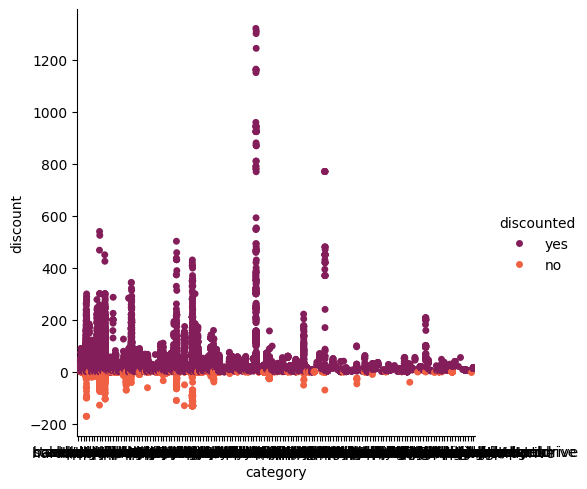

In [ ]:
sns.catplot(data=all_merged,
            x="category",
            y="discount",
            hue="discounted",
            palette="rocket");